In [20]:
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical

In [21]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo: #read in binary mode rb
        dict = pickle.load(fo,  encoding='latin1')
    return dict

In [22]:
train  = unpickle('./cifar-100-python/train')
test = unpickle('./cifar-100-python/test')
meta = unpickle('./cifar-100-python/meta')

In [23]:
print(train.keys())
print(test.keys())
print(meta.keys())

dict_keys(['filenames', 'batch_label', 'fine_labels', 'coarse_labels', 'data'])
dict_keys(['filenames', 'batch_label', 'fine_labels', 'coarse_labels', 'data'])
dict_keys(['fine_label_names', 'coarse_label_names'])


In [24]:
train_data = train['data']
train_labels = np.array(train['fine_labels'])
train_super_labels = np.array(train['coarse_labels'])

test_data = test['data']
test_labels = np.array(test['fine_labels'])
test_super_labels = np.array(test['coarse_labels'])

label_names = meta['fine_label_names']
label_super_names = meta['coarse_label_names']

In [25]:
print('Train: X=%s, y=%s' % (train_data.shape, train_labels.shape))
print('Test: X=%s, y=%s' % (test_data.shape, test_labels.shape))

Train: X=(50000, 3072), y=(50000,)
Test: X=(10000, 3072), y=(10000,)


In [26]:
# a method to return dataset in format [num_images,image_height,image_width,num_channels] 
def reshape(dataset):
    return np.reshape(dataset, (-1, 3, 32, 32)).transpose((0, 2, 3, 1))


# a method to shuffle dataset and labels 
# def randomize(dataset, labels):
#     permutation = np.random.permutation(dataset.shape[0])
#     shuffled_dataset = dataset[permutation, :, :]
#     shuffled_labels = labels[permutation]
#     return shuffled_dataset, shuffled_labels
	
# reshape and shuffle print("Shuffling Data..")

#train_data = reshape(train_data)
#test_data = reshape(test_data)
#train_data, train_labels = randomize(train_data, train_labels)

In [27]:
trainX = reshape(train_data)
testX = reshape(test_data)

trainy = to_categorical(train_labels)
testy = to_categorical(test_labels)
trainy_super = to_categorical(train_super_labels)
testy_super = to_categorical(test_super_labels)

print('Train: X=%s, y=%s, y_super=%s' % (trainX.shape, trainy.shape, trainy_super.shape))
print('Test: X=%s, y=%s, y_super=%s' % (testX.shape, testy.shape, testy_super.shape))

Train: X=(50000, 32, 32, 3), y=(50000, 100), y_super=(50000, 20)
Test: X=(10000, 32, 32, 3), y=(10000, 100), y_super=(10000, 20)


In [28]:
# a method to sharpen the blurry images 
# import cv2
# def sharpen(dataset):
#     # img = rgb2gray(img)     
#     kernel = (-1 / 256.0) * np.array(
#         np.asarray([[1, 4, 6, 4, 1], [4, 16, 24, 16, 4], [6, 24, -476, 24, 6], [4, 16, 24, 16, 4], [1, 4, 6, 4, 1]]))

#     for i in range(dataset.shape[0]):
#         dataset[i] = cv2.filter2D(dataset[i], -1, kernel)

#     return dataset

#train_data = sharpen(train_data)
#test_data = sharpen(test_data)

shape:  (32, 32, 3)
label: cattle


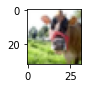

In [29]:
img = trainX[0]

print("shape: ", img.shape)
print('label:', meta['fine_label_names'][train['fine_labels'][0]])

plt.figure(figsize=(1,1)) 
plt.imshow(img, cmap=plt.get_cmap('gray')) 
plt.show()

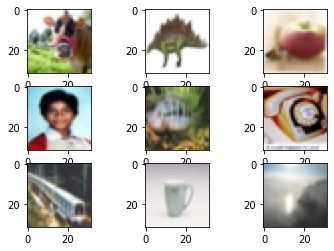

In [30]:
# plot first few images
for i in range(9):
    #plt.subplot(330 + 1 + i) # encoded as a single integer 3 rows, 3 columns, ith plot
    plt.subplot(3,3,1+i) # subplot 3 rows, 5 columns, ith subplot
    plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))
plt.show()

(50000, 32, 32, 3)

In [12]:
# from matplotlib import pyplot
# from keras.datasets import cifar100
# # load dataset
# (trainX1, trainy1), (testX1, testy1) = cifar100.load_data()
# # summarize loaded dataset
# print('Train: X=%s, y=%s' % (trainX1.shape, trainy1.shape))
# print('Test: X=%s, y=%s' % (testX1.shape, testy1.shape))
# # plot first few images
# for i in range(9):
# 	# define subplot
# 	pyplot.subplot(330 + 1 + i)
# 	# plot raw pixel data
# 	pyplot.imshow(trainX1[i])
# # show the figure
# pyplot.show()


In [14]:
trainy.shape

(50000, 100)

In [ ]:
to_categorical(trainy1).shape

In [ ]:
to_categorical(testy1).shape

In [19]:
meta['fine_label_names']


['apple',
 'aquarium_fish',
 'baby',
 'bear',
 'beaver',
 'bed',
 'bee',
 'beetle',
 'bicycle',
 'bottle',
 'bowl',
 'boy',
 'bridge',
 'bus',
 'butterfly',
 'camel',
 'can',
 'castle',
 'caterpillar',
 'cattle',
 'chair',
 'chimpanzee',
 'clock',
 'cloud',
 'cockroach',
 'couch',
 'crab',
 'crocodile',
 'cup',
 'dinosaur',
 'dolphin',
 'elephant',
 'flatfish',
 'forest',
 'fox',
 'girl',
 'hamster',
 'house',
 'kangaroo',
 'keyboard',
 'lamp',
 'lawn_mower',
 'leopard',
 'lion',
 'lizard',
 'lobster',
 'man',
 'maple_tree',
 'motorcycle',
 'mountain',
 'mouse',
 'mushroom',
 'oak_tree',
 'orange',
 'orchid',
 'otter',
 'palm_tree',
 'pear',
 'pickup_truck',
 'pine_tree',
 'plain',
 'plate',
 'poppy',
 'porcupine',
 'possum',
 'rabbit',
 'raccoon',
 'ray',
 'road',
 'rocket',
 'rose',
 'sea',
 'seal',
 'shark',
 'shrew',
 'skunk',
 'skyscraper',
 'snail',
 'snake',
 'spider',
 'squirrel',
 'streetcar',
 'sunflower',
 'sweet_pepper',
 'table',
 'tank',
 'telephone',
 'television',
 'tig

In [ ]:
import numpy as np

a3 = np.array([[[10, 11, 12], [13, 14, 15], [16, 17, 18],[19, 20, 21]],
               [[20, 21, 22], [23, 24, 25], [26, 27, 28],[29, 30, 31]],
               [[30, 31, 32], [33, 34, 35], [36, 37, 38],[39, 40, 41]],
               [[40, 41, 42], [43, 44, 45], [46, 47, 48],[49, 50, 51]]])

a3.shape

b1 = a3[0]
b2 = a3[1]
b3 = a3[2]

c = np.stack([b1, b2, b3])
c

In [ ]:
x0 = pd.DataFrame(a3[0])
x1 = pd.DataFrame(a3[1])
x2 = pd.DataFrame(a3[2])
x3 = pd.DataFrame(a3[3])

x0 = x0.sample(frac=.5, random_state=101)
ids = x0.index.values
print(ids)

x1 = x1[x1.index.isin(ids)]
x2 = x2[x2.index.isin(ids)]
x3 = x3[x3.index.isin(ids)]

c  = np.stack([x0,x1,x2,x3])
c

In [4]:
from math import comb
def error_ensemble(N, k, e):
    acc = 0
    for i in range(k, N):
        acc = acc + (comb(N,i) * pow(e, i) * pow((1-e), N-i))
    return acc

In [5]:
error_ensemble(9,5,0.5)

0.498046875